In [99]:
# Try it out !
# Uncomment the code to run this cell
# Code Below
# Calculating Conditional Probability using Bayes Theorem :-
#---------------------------------------------------------------------------------------------------------------------------

# P_A = float(input("Enter the probability of event A =  "))  # Probability of event A
# P_B_given_A = float(input("Enter the probability of event B given event A =  "))  # Probability of event B given event A

# # Calculate the complement of event A
# P_not_A = 1 - P_A

# # Calculate the probability of event B
# P_B = P_B_given_A * P_A + (1 - P_B_given_A) * P_not_A

# # Calculate the conditional probability using Bayes' theorem
# P_A_given_B = (P_B_given_A * P_A) / P_B

# # Print the results
# print(f"P(A|B) = {P_A_given_B:.2f}")

In [100]:
#Importing the Necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [101]:
# Reading the data from .csv file
data = pd.read_csv('spam.csv')

In [102]:
#display the first 5 rows
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [103]:
# Drop the columns with NaN values
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [104]:
# Rename columns for clarity:
data.columns = ['label', 'text']

In [105]:
# Displaying the first 5 rows to get basic understanding of the data
print(data.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [106]:
# Separate features (X) and target labels (y)
X =  data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [108]:
# Create a CountVectorizer instance
vectorizer = CountVectorizer()

In [109]:
# Fit and transform the training data (X_train)
X_train_vectorized = vectorizer.fit_transform(X_train['text'])

# Transform the test data (X_test)
X_test_vectorized = vectorizer.transform(X_test['text'])

In [110]:
# Train the Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [111]:
# Make predictions on the test data
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.98
Confusion Matrix:
[[963   2]
 [ 16 134]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



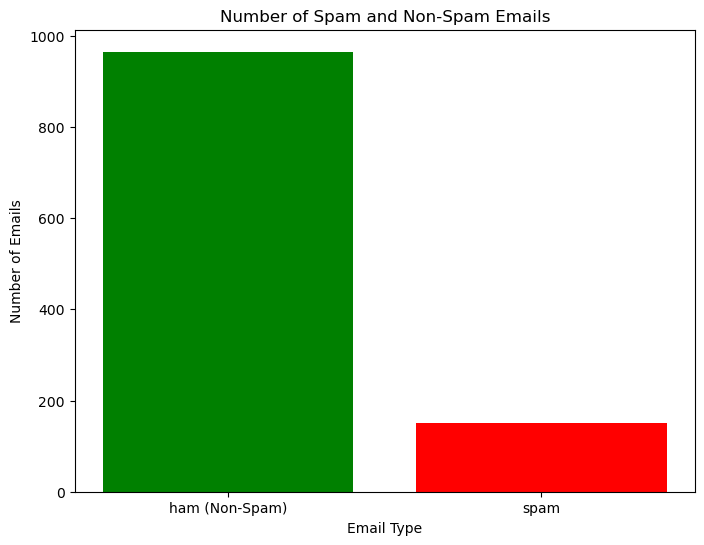

In [112]:
import matplotlib.pyplot as plt

# Count the number of spam and non-spam emails in the test set
spam_counts = y_test.value_counts()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(spam_counts.index, spam_counts.values, color=['green', 'red'])
plt.xlabel('Email Type')
plt.ylabel('Number of Emails')
plt.title('Number of Spam and Non-Spam Emails')
plt.xticks([0, 1], ['ham (Non-Spam)', 'spam'])
plt.show()

In [113]:
# New emails to classify
new_emails = [
    "Congratulations! You've been selected to receive a free iPhone! Click here to claim now!",
    "Urgent: Your account has been compromised! Click this link immediately to protect your account.",
    "You've won £1000 in our lottery! Send your bank details to claim your prize.",
    "Exclusive offer just for you: Get 70% off on your next hotel booking. Hurry up, offer ends soon!",
    "Dear user, we noticed unusual activity in your account. Verify your account by clicking on this link.",
    "Hi there, just a reminder about our meeting tomorrow at 10 AM. Please let me know if you need to reschedule.",
    "Dear customer, your order has been shipped. You can track your package using this tracking number: AB123456789.",
    "Hello team, please find attached the report for last month's performance. Let's discuss it in our next meeting.",
    "Hi, I found this article about climate change and thought you might find it interesting. Here's the link.",
    "Thank you for your email. I'm currently out of the office but will get back to you first thing Monday morning."
]

# Convert the new emails to the numerical format
new_emails_counts = vectorizer.transform(new_emails)

# Predict whether each email is spam or not
predictions = classifier.predict(new_emails_counts)

# Print the predictions
for email, prediction in zip(new_emails, predictions):
    print(f"Email: {email}\nPrediction: {prediction}\n")

Email: Congratulations! You've been selected to receive a free iPhone! Click here to claim now!
Prediction: spam

Email: Urgent: Your account has been compromised! Click this link immediately to protect your account.
Prediction: spam

Email: You've won £1000 in our lottery! Send your bank details to claim your prize.
Prediction: spam

Email: Exclusive offer just for you: Get 70% off on your next hotel booking. Hurry up, offer ends soon!
Prediction: ham

Email: Dear user, we noticed unusual activity in your account. Verify your account by clicking on this link.
Prediction: spam

Email: Hi there, just a reminder about our meeting tomorrow at 10 AM. Please let me know if you need to reschedule.
Prediction: ham

Email: Dear customer, your order has been shipped. You can track your package using this tracking number: AB123456789.
Prediction: ham

Email: Hello team, please find attached the report for last month's performance. Let's discuss it in our next meeting.
Prediction: ham

Email: Hi,